In [19]:
import ccxt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [12]:
exchange = ccxt.poloniex()
markets = exchange.load_markets()
symbols = list(markets.keys())

In [ ]:

# symbols = [str(s.xsplit("/")[-1]) for s in symbols]


{'AVB/USDT',
 'SIGMA/USDT',
 'LTC/USDC',
 'LQTY/USDT',
 'KABOSUETH/USDT',
 'LOOT/USDT',
 'USELESS/USDT',
 'WZRD/USDT',
 'BTT/USDC',
 'XRP/USDC',
 'BTT/USDT',
 'SAFE/USDT',
 'DC/USDT',
 'SUI/USDT',
 'YFII/USDT',
 'YESBUT/USDT',
 'TOKE/USDT',
 'MEMESAI/USDT',
 'NATO/USDT',
 'SHRUB/USDT',
 'FAI/USDT',
 'AWE/USDT',
 'OLAS/USDT',
 'MPWR/USDT',
 'DASH/USDT',
 'LPT/USDT',
 'CHILLGUY/USDT',
 'APEPE/USDT',
 'VEXT/USDT',
 'DOGE/USDT',
 'YFI/USDT',
 'AEVO/USDT',
 'PYR/USDT',
 'TOMI/USDT',
 'XMR/BTC',
 'CRV/USDT',
 'RAY/USDT',
 'BLAST/USDT',
 'VENOM/USDT',
 'BABYNEIRO/USDT',
 'TUCKER/USDT',
 'POLS/USDT',
 'PNUTSOL/USDT',
 'XCAD/USDT',
 'SPONGE/USDT',
 'ENJ/USDT',
 'GNS/USDT',
 'AI1/USDT',
 'PORK/USDT',
 'RDEX/USDT',
 'RIFSOL/USDT',
 'SSE/USDT',
 'AGON/USDT',
 'KCS/USDT',
 'G/USDT',
 'BIGTIME/USDT',
 'UNISUI/USDT',
 'BUILD/USDT',
 'PORTO/USDT',
 'TSUKA/USDT',
 'PINK/USDT',
 'APT/USDT',
 'FOCAI/USDT',
 'CCCTRON/USDT',
 'CHKN/USDT',
 'ADA/USDT',
 'BOBO/USDT',
 'RCH/USDT',
 'BABYDOGE/USDT',
 'FACTR/US

In [ ]:
usdt_pairs = [s for s in symbols if '/USDT' in s]


['BTC/USDT',
 'DASH/USDT',
 'LTC/USDT',
 'XLM/USDT',
 'XMR/USDT',
 'XRP/USDT',
 'ETH/USDT',
 'ETC/USDT',
 'ZEC/USDT',
 'A/USDT',
 'BAT/USDT',
 'DOGE/USDT',
 'LSK/USDT',
 'SC/USDT',
 'ZRX/USDT',
 'QTUM/USDT',
 'MANA/USDT',
 'ATOM/USDT',
 'BSV/USDT',
 'TRX/USDT',
 'BTT/USDT',
 'WIN/USDT',
 'XTZ/USDT',
 'USDJ/USDT',
 'SNX/USDT',
 'POL/USDT',
 'MKR/USDT',
 'DAI/USDT',
 'NEO/USDT',
 'SWFTC/USDT',
 'JST/USDT',
 'STEEM/USDT',
 'LINK/USDT',
 'AVA/USDT',
 'XRPBULL/USDT',
 'CHR/USDT',
 'BNB/USDT',
 'MDT/USDT',
 'COMP/USDT',
 'REN/USDT',
 'LRC/USDT',
 'BAL/USDT',
 'SXP/USDT',
 'YFI/USDT',
 'AWE/USDT',
 'UMA/USDT',
 'RING/USDT',
 'SWAP/USDT',
 'GEEQ/USDT',
 'BAND/USDT',
 'DOS/USDT',
 'DIA/USDT',
 'TRB/USDT',
 'CRV/USDT',
 'OM/USDT',
 'OCEAN/USDT',
 'PRQ/USDT',
 'DOT/USDT',
 'RSR/USDT',
 'WNXM/USDT',
 'FCT2/USDT',
 'SUSHI/USDT',
 'YFII/USDT',
 'KAON/USDT',
 'UNI/USDT',
 'CVP/USDT',
 'GHST/USDT',
 'RARI/USDT',
 'AMP/USDT',
 'SAND/USDT',
 'POLS/USDT',
 'AAVE/USDT',
 'CVT/USDT',
 'INJ/USDT',
 'BCH/USD

In [125]:
def get_historical_ohlcv_prices_from_pairs(exchange, pairs, timeframe='1d', since_days=30, limit=1000):
    results = {}
    since = exchange.parse8601((datetime.utcnow() - timedelta(days=since_days)).isoformat())

    for pair in pairs:
        if pair in exchange.markets:
            try:
                ohlcv = exchange.fetch_ohlcv(pair, timeframe=timeframe, since=since, limit=limit)
                df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
                df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
                results[pair] = df
            except Exception as e:
                print(f"Error fetching {pair}: {e}")
        else:
            print(f"Pair not available on exchange: {pair}")

    return results


In [ ]:
fetch_ohlcv_range(exchange, 'BTC/USDT', )

In [161]:
ohlcv = get_ohlcv_for_range(exchange, ['BTC/USDT'], timeframe='5m',
                            start_date='2025-03-10', end_date='2025-03-10')


In [162]:
ohlcv

{'BTC/USDT': Empty DataFrame
 Columns: [timestamp, open, high, low, close, volume]
 Index: []}

In [146]:
exchange.fetch_ohlcv()

TypeError: fetch_ohlcv() missing 1 required positional argument: 'symbol'

In [ ]:
ohlcv_data = get_historical_ohlcv_prices_from_pairs(exchange, usdt_pairs[:1], timeframe='5m',)
len(ohlcv_data)

1

In [152]:
len(ohlcv_data['BTC/USDT'])

500

In [153]:
daily_data_btc = pd.DataFrame(ohlcv_data['BTC/USDT'].set_index('timestamp'))

<Axes: xlabel='timestamp'>

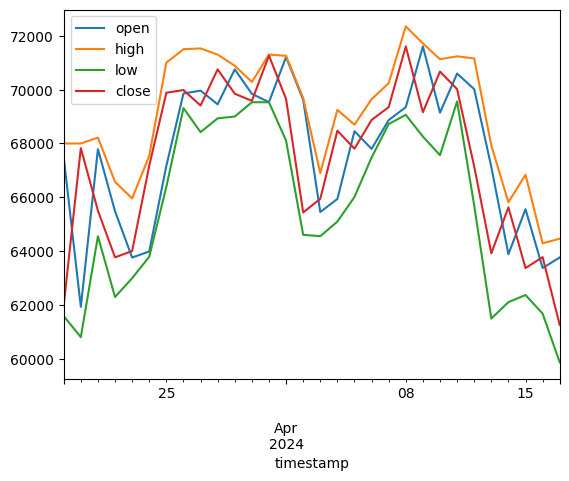

In [154]:
daily_data_btc[:30].drop('volume', axis=1).plot()

In [18]:
market_df = pd.DataFrame(markets)

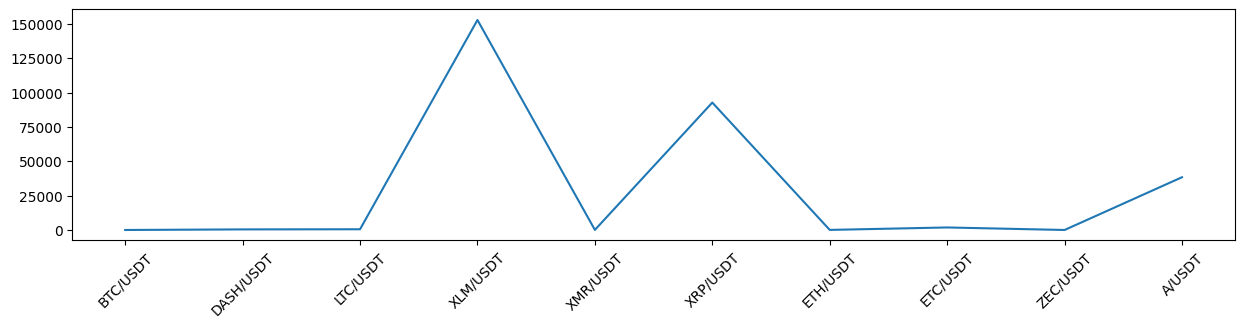

In [52]:
vols = {}
for k in ohlcv_data:

    vols[k] = ohlcv_data[k]['volume'].max()
plt.figure(figsize=(15,3))
plt.plot(pd.Series(vols))
plt.xticks(rotation=45) 
plt.show()

stationarity

In [56]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    return {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Critical Values': result[4],
        'Is Stationary (p < 0.05)': result[1] < 0.05
    }

for pairs in ohlcv_data:
    print(pairs)
    print(adf_test(pd.Series(ohlcv_data[pairs]['close']))['Is Stationary (p < 0.05)'])

BTC/USDT
False
DASH/USDT
False
LTC/USDT
False
XLM/USDT
False
XMR/USDT
False
XRP/USDT
False
ETH/USDT
False
ETC/USDT
True
ZEC/USDT


ValueError: Invalid input, x is constant

'BTC/USDT'

In [90]:
base_data = pd.DataFrame()
for pair in ohlcv_data:
    base_data[pair] = ohlcv_data[pair]['close']
base_data = base_data.dropna()
# base_data = (base_data - base_data.mean())/base_data.std()
base_data['timestamp'] = ohlcv_data[list(ohlcv_data.keys())[0]]['timestamp']


In [85]:
from statsmodels.tsa.stattools import coint
import pandas as pd
from itertools import combinations

def test_cointegration_and_rank(base_data, significance_level=0.05):
    results = []

    for pair1, pair2 in combinations(base_data.columns,2):
        try:
            
            x = base_data[pair1]
            y =  base_data[pair2]

            if len(x.dropna()) < 30 or len(y.dropna()) < 30:
                continue

            score, pvalue, _ = coint(x, y)

            results.append({
                'pair_1': pair1,#.rstrip("/USDT"),
                'pair_2': pair2,#.rstrip("/USDT"),
                'p_value': pvalue,
                'cointegrated': pvalue < significance_level
            })

        except Exception as e:
            print(f"Error testing {pair1} vs {pair2}: {e}")
            continue

    results_df = pd.DataFrame(results).sort_values(by='p_value').reset_index(drop=True)
    return results_df


In [86]:
test_cointegration_and_rank(base_data)

,pair_1,pair_2,p_value,cointegrated
0,XLM/USDT,XMR/USDT,0.003929,True
1,LTC/USDT,ETC/USDT,0.020883,True
2,LTC/USDT,A/USDT,0.026656,True
3,A/USDT,timestamp,0.038597,True
4,XLM/USDT,XRP/USDT,0.040782,True
5,XLM/USDT,ETH/USDT,0.042475,True
6,BTC/USDT,DASH/USDT,0.083978,False
7,ETC/USDT,A/USDT,0.095023,False
8,ETC/USDT,timestamp,0.105644,False
9,DASH/USDT,XMR/USDT,0.193524,False


In [11]:
19//10, 19%10

(1, 9)

<Axes: >

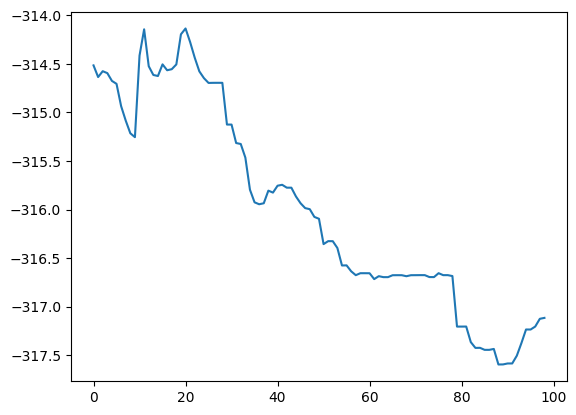

In [91]:
(base_data['XLM/USDT']-base_data['XMR/USDT']).plot()

# traDing

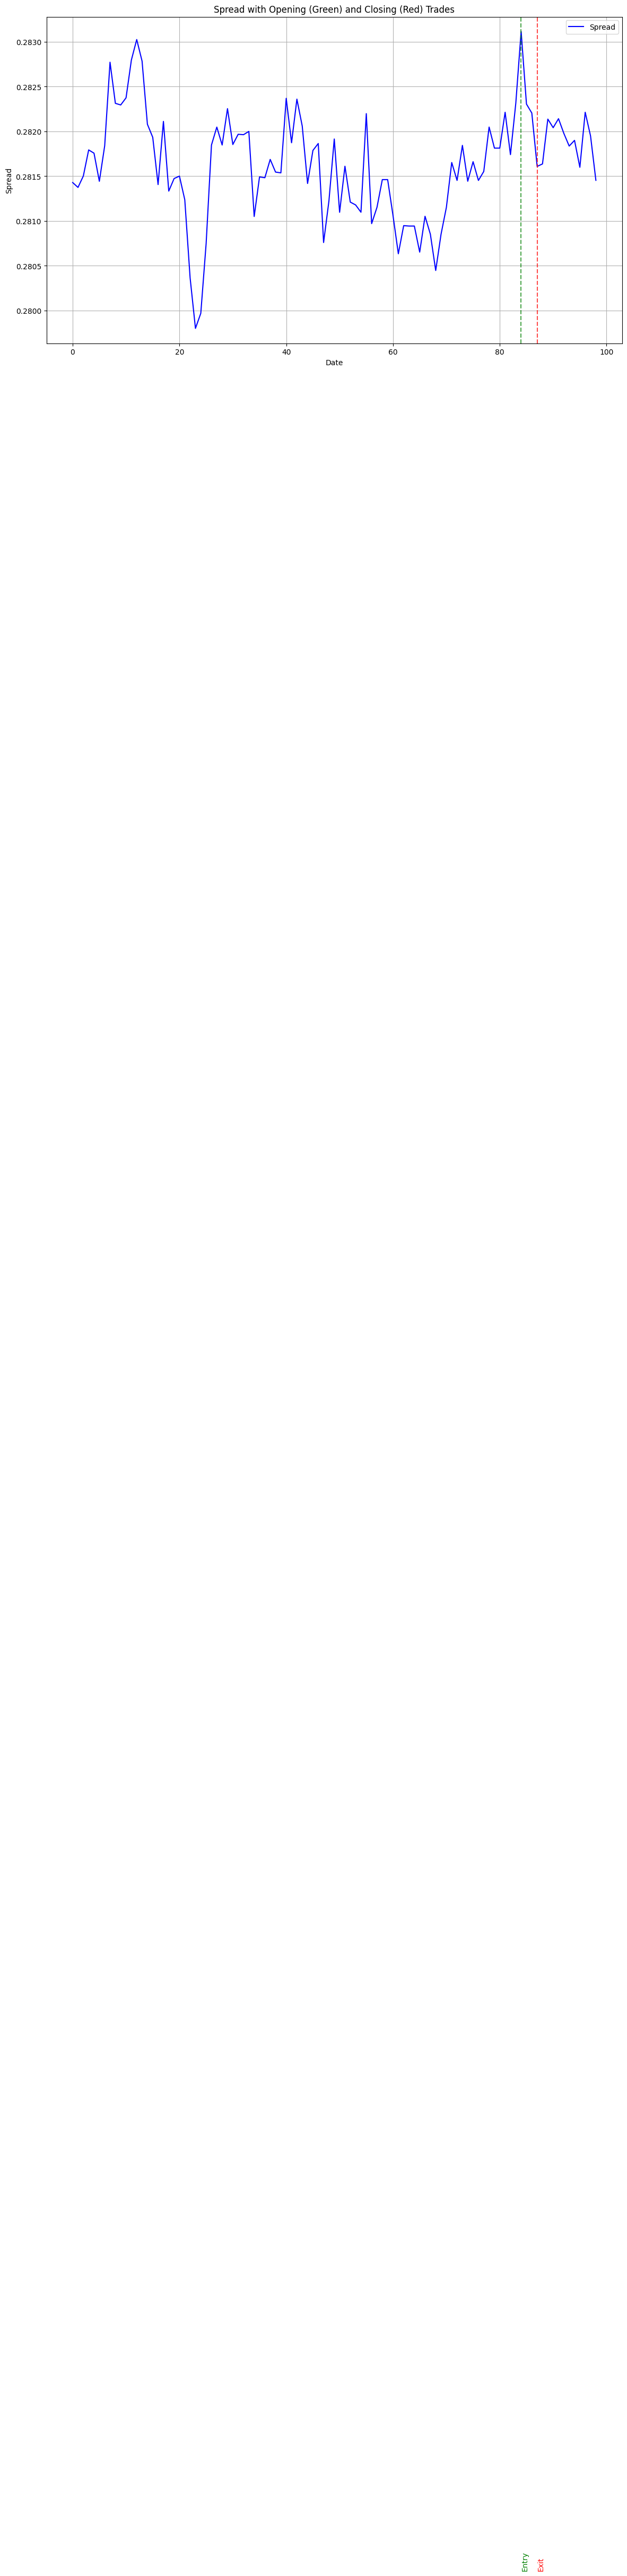

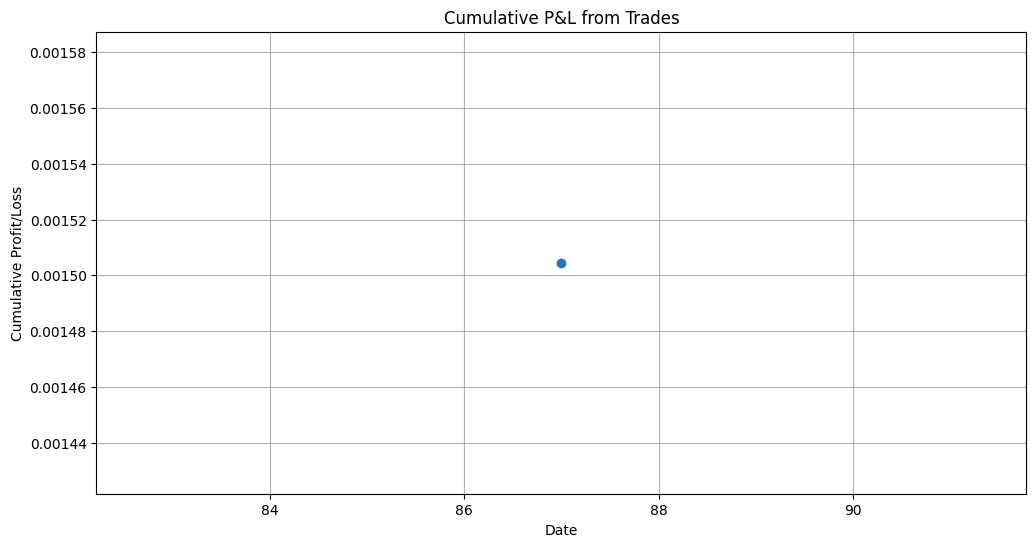

In [100]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Example: Your price DataFrame (must have columns 'XLM_USDT' and 'XMR_USDT')
# data = pd.DataFrame({'XLM_USDT': ..., 'XMR_USDT': ...}, index=...)

# 1. Calculate hedge ratio via OLS regression (XLM as dependent, XMR as independent)
model = sm.OLS(base_data['XLM/USDT'], sm.add_constant(base_data['XMR/USDT'])).fit()
hedge_ratio = model.params['XMR/USDT']

# 2. Compute spread using hedge ratio
spread = base_data['XLM/USDT'] - hedge_ratio * base_data['XMR/USDT']

# 3
# 3. Rolling mean/std z-score
window = 60  # or suitable window for your data frequency
spread_mean = spread.rolling(window=window).mean()
spread_std = spread.rolling(window=window).std()
zscore = (spread - spread_mean) / spread_std

# 4. Entry/exit thresholds
entry_threshold = 2.0
exit_threshold = 0.5

signals = pd.DataFrame(index=base_data.index)
signals['zscore'] = zscore
signals['long_entry'] = zscore < -entry_threshold
signals['short_entry'] = zscore > entry_threshold
signals['exit'] = abs(zscore) < exit_threshold

positions = []
current_position = 0
trades = []

for i in range(len(signals)):
    if current_position == 0:
        if signals['long_entry'].iloc[i]:
            positions.append(1)
            current_position = 1
            trades.append({'entry_time': signals.index[i], 'entry_price': spread.iloc[i], 'type': 'long'})
        elif signals['short_entry'].iloc[i]:
            positions.append(-1)
            current_position = -1
            trades.append({'entry_time': signals.index[i], 'entry_price': spread.iloc[i], 'type': 'short'})
        else:
            positions.append(0)
    elif current_position == 1:
        if signals['exit'].iloc[i]:
            positions.append(0)
            exit_price = spread.iloc[i]
            trades[-1].update({'exit_time': signals.index[i], 'exit_price': exit_price})
            trades[-1]['pnl'] = exit_price - trades[-1]['entry_price']
            current_position = 0
        else:
            positions.append(1)
    elif current_position == -1:
        if signals['exit'].iloc[i]:
            positions.append(0)
            exit_price = spread.iloc[i]
            trades[-1].update({'exit_time': signals.index[i], 'exit_price': exit_price})
            trades[-1]['pnl'] = trades[-1]['entry_price'] - exit_price
            current_position = 0
        else:
            positions.append(-1)

signals['position'] = positions
trades_df = pd.DataFrame(trades)

# Plot spread + trade markers
plt.figure(figsize=(14, 8))
plt.plot(spread.index, spread, label="Spread", color="blue")

for _, trade in trades_df.iterrows():
    plt.axvline(trade['entry_time'], ls="--", color="green", alpha=0.7)
    plt.text(trade['entry_time'], spread.max()*0.9, "Entry", rotation=90, color="green")
    if 'exit_time' in trade and not pd.isnull(trade['exit_time']):
        plt.axvline(trade['exit_time'], ls="--", color="red", alpha=0.7)
        plt.text(trade['exit_time'], spread.max()*0.9, "Exit", rotation=90, color="red")

plt.title("Spread with Opening (Green) and Closing (Red) Trades")
plt.xlabel("Date")
plt.ylabel("Spread")
plt.legend()
plt.grid(True)
plt.show()

# Plot cumulative PnL
plt.figure(figsize=(12, 6))
if not trades_df.empty and 'pnl' in trades_df.columns:
    pnl_cumsum = trades_df['pnl'].cumsum()
    plt.plot(trades_df['exit_time'].fillna(trades_df['entry_time']), pnl_cumsum, marker='o')
    plt.title("Cumulative P&L from Trades")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Profit/Loss")
    plt.grid(True)
else:
    plt.text(0.5, 0.5, "No completed trades to show P&L", ha="center", va="center", transform=plt.gca().transAxes)
plt.show()

In [96]:
signals

,zscore,long_entry,short_entry,exit,position,trade_open,trade_close
0,NaN,False,False,False,0,False,False
1,NaN,False,False,False,0,False,False
2,NaN,False,False,False,0,False,False
3,NaN,False,False,False,0,False,False
4,NaN,False,False,False,0,False,False
...,...,...,...,...,...,...,...
94,0.625888,False,False,False,0,False,False
95,0.050874,False,False,True,0,False,False
96,1.182703,False,False,False,0,False,False
97,0.675216,False,False,False,0,False,False
